In [141]:
import pandas as pd
import random
from sklearn.preprocessing import StandardScaler

In [142]:
titanic=pd.read_csv('datasets/train.csv')
titanic['PassengerId'].count()

891

In [143]:
test_data=pd.read_csv('test_data.csv')

In [144]:
test_data

,PassengerId,Survived_test_data
0,892,1
1,893,1
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,1
414,1306,0
415,1307,0
416,1308,0


In [145]:
final_test=test_data.pop('Survived_test_data')

In [146]:
final_test

0      1
1      1
2      0
3      1
4      0
      ..
413    1
414    0
415    0
416    0
417    0
Name: Survived_test_data, Length: 418, dtype: int64

In [147]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [148]:
# Now to convert the bool value from object to binary (0,1), like male/female will be (0,1).
titanic['Sex']= titanic["Sex"].replace(['male','female'],[0,1])
titanic['Embarked']= titanic["Embarked"].replace(['S','C','Q'],[0,1,2])
titanic['Embarked']=titanic['Embarked'].fillna(random.randint(1,3))

In [149]:
titanic['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [150]:
# here we are defining the range of age into a number so it will be easy to understand the range by number.
# like age=0  means below 5 , age=25 means below 25
titanic.loc[ titanic["Age"] <= 5, "Age"] = 0
titanic.loc[(titanic["Age"] > 5) & (titanic["Age"] <= 15), "Age"] = 1
titanic.loc[(titanic["Age"] > 15) & (titanic["Age"] <= 25), "Age"] = 2
titanic.loc[(titanic["Age"] > 25) & (titanic["Age"] <= 35), "Age"] = 3
titanic.loc[(titanic["Age"] > 35) & (titanic["Age"] <= 45), "Age"] = 4
titanic.loc[(titanic["Age"] > 45) & (titanic["Age"] <= 55), "Age"] = 5
titanic.loc[(titanic["Age"] > 55) & (titanic["Age"] <= 65), "Age"] = 6
titanic.loc[ titanic["Age"] > 65, "Age"] = 7

In [151]:
titanic["Age"]=titanic['Age'].fillna(random.randint(0,7))

In [152]:
titanic["Age"]=titanic['Age'].astype(int)

In [153]:
titanic["Age"]

0      2
1      4
2      3
3      3
4      3
      ..
886    3
887    2
888    7
889    3
890    3
Name: Age, Length: 891, dtype: int64

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report

In [155]:
X_features=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
X=titanic[X_features]
y=titanic['Survived']

In [156]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.469)

In [157]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
130,3,0,3,0,0,7.8958,1.0
406,3,0,5,0,0,7.7500,0.0
713,3,0,3,0,0,9.4833,0.0
738,3,0,7,0,0,7.8958,0.0
334,1,1,7,1,0,133.6500,0.0
...,...,...,...,...,...,...,...
423,3,1,3,1,1,14.4000,0.0
532,3,0,2,1,1,7.2292,1.0
46,3,0,7,1,0,15.5000,2.0
600,2,1,2,2,1,27.0000,0.0


In [158]:
scaler=StandardScaler()

In [159]:
scaler.fit(x_train,y_train)

StandardScaler()

In [166]:
logi_model=LogisticRegression(max_iter=4000)

In [167]:
logi_model.fit(x_train,y_train)

LogisticRegression(max_iter=4000)

In [168]:
y_pred=logi_model.predict(x_test)

In [169]:
accuracy_score(y_pred,final_test)

0.5263157894736842

# Another way is :

In [133]:
# lr=LogisticRegression(penalty='l2',C=1,solver="liblinear")
# lr.fit(x_train,y_train)

LogisticRegression(C=1, solver='liblinear')

In [82]:
predicted_value=lr.predict(x_test)
predicted_value

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,

In [84]:
# plotting the comparison or difference between actual value and predicted value.
comparison=pd.DataFrame({'Actual value':y_test,'Predicted value':predicted_value})
comparison

,Actual value,Predicted value
605,0,0
538,0,0
50,0,0
95,0,0
850,0,0
...,...,...
234,0,0
767,0,1
556,1,1
523,1,1


In [85]:
print(" the Accuracy Score is: ",accuracy_score(y_test,predicted_value))
print(" the precision Score is: ",precision_score(y_test,predicted_value))
print(" the recall Score is: ",recall_score(y_test,predicted_value))

 the Accuracy Score is:  0.8110047846889952
 the precision Score is:  0.7737226277372263
 the recall Score is:  0.6883116883116883


In [86]:
print(confusion_matrix(y_test,predicted_value))

[[233  31]
 [ 48 106]]


In [87]:
print(classification_report(y_test,predicted_value))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       264
           1       0.77      0.69      0.73       154

    accuracy                           0.81       418
   macro avg       0.80      0.79      0.79       418
weighted avg       0.81      0.81      0.81       418



In [88]:
import numpy as np
ids=test_data['PassengerId']
output= pd.DataFrame({'PassengerId':ids,"Survived": predicted_value})

In [89]:
output 

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,1
416,1308,1


In [90]:
output.to_csv('result.csv',index=False)

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Age', ylabel='Survived'>

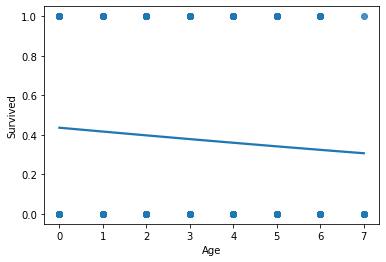

In [92]:
sns.regplot(x=titanic["Age"], y=y, data=titanic, logistic=True, ci=None)

<AxesSubplot:xlabel='Survived'>

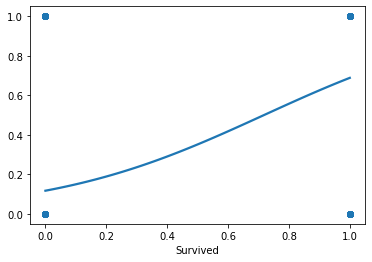

In [93]:
sns.regplot(x=y_test, y=predicted_value, data=titanic, logistic=True, ci=None)